<a href="https://colab.research.google.com/github/mt3011/metodos-numericos/blob/main/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

## Questão 1

In [5]:
#Funções:

def y1(x):
  return x**3 + x**2 - 10*x + 10

def y2(x):
  return np.sin(x)/x

def y3(x, a=1):
  return np.exp(-a*x)*np.sin(x)

#Derivadas Analíticas:

def dy1(x):
    return 3*x**2 + 2*x -10

def dy2(x):
    return (x*np.cos(x) - np.sin(x))/(x**2)

def dy3(x, a=1):
    return -a*np.exp(-a*x)*np.sin(x) + np.exp(-a*x)*np.cos(x)

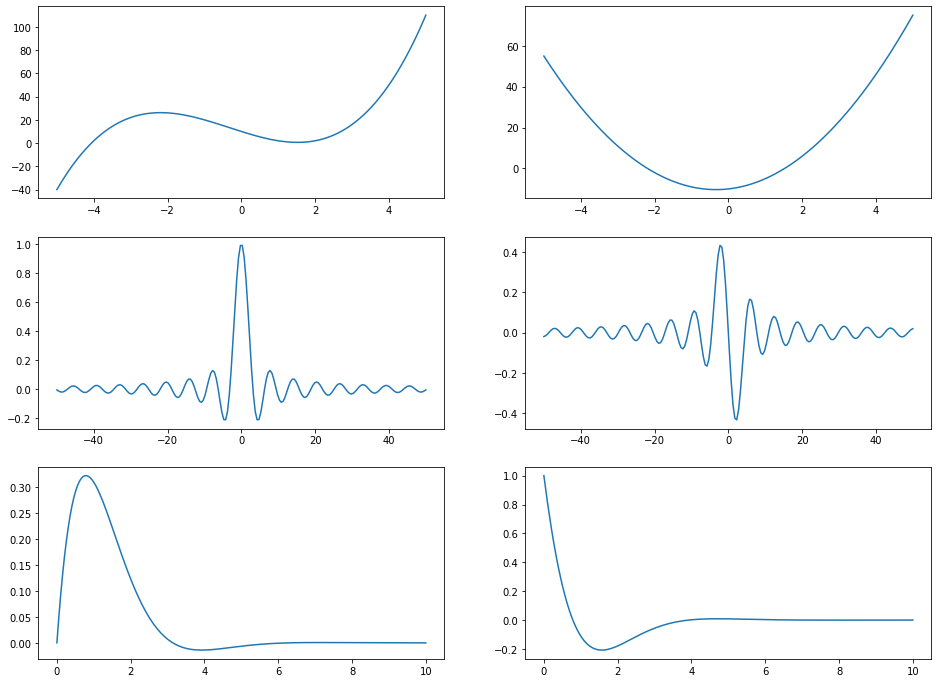

In [6]:
x1 = np.linspace(-5, 5, 200)
x2 = np.linspace(-50, 50, 200)
x3 = np.linspace(0, 10, 200)

fig, axes = plt.subplots(3,2,figsize=(16, 12))

axes[0][0].plot(x1, y1(x1))
axes[0][1].plot(x1, dy1(x1))

axes[1][0].plot(x2, y2(x2))
axes[1][1].plot(x2, dy2(x2))

axes[2][0].plot(x3, y3(x3))
axes[2][1].plot(x3, dy3(x3))

## Questão 2

In [7]:
# Derivadas Numéricas

def dyp(x, f=y1, a=1): # Derivada Progressiva
  y = f(x)
  return np.array([(y[i+1]-y[i])/(x[i+1] - x[i]) for i in range(0,len(x) -1)])

def dyr(x, f=y1, a=1): # Derivada Regressiva
  y = f(x)
  return np.array([(y[i]-y[i-1])/(x[i] - x[i-1]) for i in range(1,len(x))])

def dyc(x, f=y1, a=1): # Derivada Central
  y = f(x)
  return np.array([(y[i+1]-y[i-1])/(x[i+1] - x[i-1]) for i in range(1,len(x) -1)])

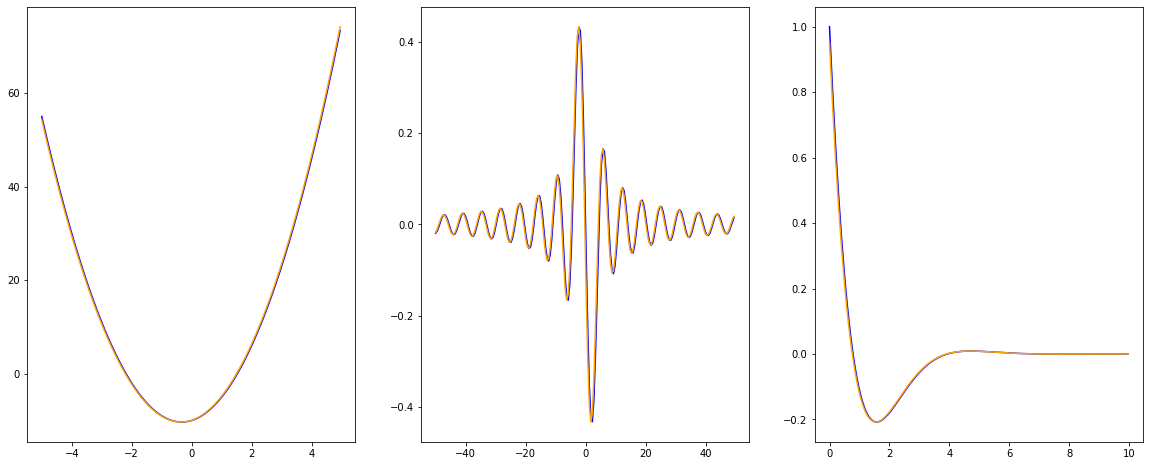

In [8]:
x1 = np.linspace(-5, 5, 200)
x2 = np.linspace(-50, 50, 200)
x3 = np.linspace(0, 10, 200)

fig, axes = plt.subplots(1,3,figsize=(20, 8))


axes[0].plot(x1[:-1], dy1(x1)[:-1], 'blue', x1[:-1], dyp(x1, y1), 'orange')
axes[1].plot(x2[:-1], dy2(x2)[:-1], 'blue', x2[:-1], dyp(x2, y2), 'orange')
axes[2].plot(x3[:-1], dy3(x3)[:-1], 'blue', x3[:-1], dyp(x3, y3), 'orange')

## Questão 3

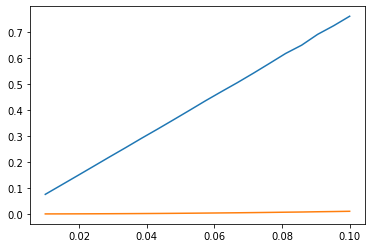

In [9]:
DX = np.linspace(0.01, 0.1, num=20)
#Função 1
errointR = np.zeros(len(DX))
errointC = np.zeros(len(DX))
i = 0
for dx in DX:
  steps = round(10/dx)
  x = np.linspace(-5, 5, steps)

  erro = np.abs(dy1(x)[:-1] - dyp(x, y1))
  errointR[i] = sum( erro )/(len(x) - 1)

  erro = np.abs(dy1(x)[1:-1] - dyc(x, y1))
  errointC[i] = sum( erro )/(len(x) - 2)
  
  i += 1

plt.plot(DX, errointR)
plt.plot(DX, errointC)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


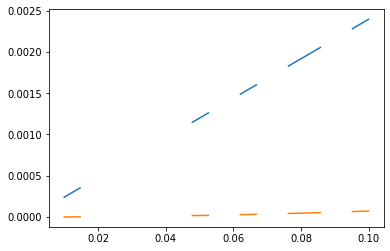

In [10]:
#Função 2
errointR = np.zeros(len(DX))
errointC = np.zeros(len(DX))
i = 0
for dx in DX:
  steps = round(100/dx)
  x = np.linspace(-50, 50, steps)

  erro = np.abs(dy2(x)[:-1] - dyp(x, y2))
  errointR[i] = sum( erro )/(len(x) - 1)

  erro = np.abs(dy2(x)[1:-1] - dyc(x, y2))
  errointC[i] = sum( erro )/(len(x) - 2)
  
  i += 1

plt.plot(DX, errointR)
plt.plot(DX, errointC)

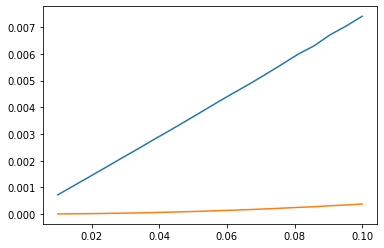

In [11]:
#Função 2
errointR = np.zeros(len(DX))
errointC = np.zeros(len(DX))
i = 0
for dx in DX:
  steps = round(10/dx)
  x = np.linspace(0, 10, steps)

  erro = np.abs(dy3(x)[:-1] - dyp(x, y3))
  errointR[i] = sum( erro )/(len(x) - 1)

  erro = np.abs(dy3(x)[1:-1] - dyc(x, y3))
  errointC[i] = sum( erro )/(len(x) - 2)
  
  i += 1

plt.plot(DX, errointR)
plt.plot(DX, errointC)

## Questão 4

In [12]:
def Y1(x):
  return (x**4)/4 + (x**3)/3 - 5*(x**2) + 10*x 

def int_y1(a,b):
  return Y1(b) - Y1(a)

In [13]:
#Método dos Retângulos
def integrar1(a,b,dx,f):
  area = 0
  N = round((b-a)/dx)
  x = np.linspace(a,b,N)
  for y in f(x)[:-1]:
    area += y*dx

  return area

In [23]:
#Método do Trapézio
def integrar2(a,b,dx,f):
  area = 0
  N = round((b-a)/dx)
  x = np.linspace(a,b,N)
  y = f(x)
  for i in range(len(x) - 1):
    area += (y[i] + y[i+1])*dx/2

  return area

integrar2(-5,5,dx,y1)

182.42085427135686

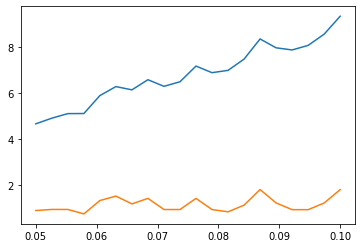

In [25]:
DX = np.linspace(0.05, 0.1, 20)
errolist1 = []
errolist2 = []
for dx in DX:  
  erro = np.abs(int_y1(-5,5) - integrar1(-5,5,dx,y1))
  errolist1.append(erro)
  erro = np.abs(int_y1(-5,5) - integrar2(-5,5,dx,y1))
  errolist2.append(erro)

plt.plot(DX, errolist1, label='Riemman')
plt.plot(DX, errolist2, label='Trapézio')
plt.legend

## Questão 5

In [176]:
N0 = 10
tau = 1
dt = 0.01

def N(dt):

  time = np.linspace(0,5,round(5/dt))
  
  N1 = N0*np.exp(-time/tau) #Vetor com Valor teórico

  N2 = np.zeros(round(5/dt))
  N3 = np.zeros(round(5/dt))

  N2[0] = N0
  N3[0] = N0

  #Calculando N[1] com derivada regressiva
  N2[1] = N2[0]/(1+(dt))

  #Calculando os outros valores de N[t] com derivada central
  for t in range(2, len(time)):
    N2[t] = N2[t-2] - 2*N2[t-1]*dt
  
  #Calculando os outros valores de N[t] com derivada regressiva
  for t in range(1, len(time)):
    N3[t] = N3[t-1]/(1+(dt))

  return time, N1, N2, N3


In [ ]:
def plot(dt):
  time, N1, N2, N3 = N(dt)
  plt.plot(time, N1)
  plt.plot(time, N2)

interact(plot, dt=widgets.FloatSlider(min=0.01,max=0.1,
                                step=0.02,value=0.0,
                                description = 'dt = '))


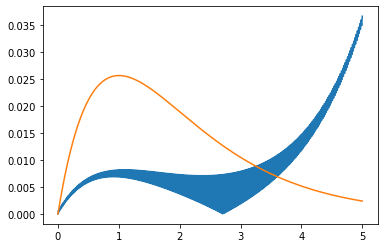

In [188]:
dt = 0.01

time, N1, N2, N3 = N(dt)

delta1 = np.abs(N2 - N1)
delta2 = np.abs(N3 - N1)

erroint1 = sum(delta1)/len(delta1)
erroint2 = sum(delta2)/len(delta2)

plt.plot(time, delta1, time, delta2)

Text(0, 0.5, 'ERRO')

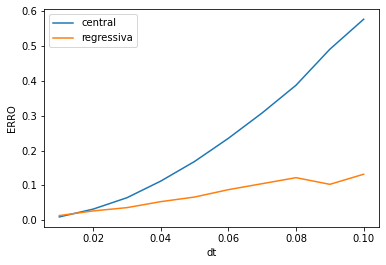

In [190]:
erroint1_list = []
erroint2_list = []

Dt = np.linspace(0.01,0.1, 10)

for dt in Dt:
  time, N1, N2, N3 = N(dt)

  delta1 = np.abs(N2 - N1)
  delta2 = np.abs(N3 - N1)

  erroint1 = sum(delta1)/len(delta1)
  erroint2 = sum(delta2)/len(delta2)

  erroint1_list.append(erroint1)
  erroint2_list.append(erroint2)

plt.plot(Dt, erroint1_list, label='central')
plt.plot(Dt, erroint2_list, label='regressiva')
plt.legend()
plt.xlabel('dt')
plt.ylabel('ERRO')